In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

/Users/pragunkathuria/Downloads/evsLM-main/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/pragunkathuria/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1


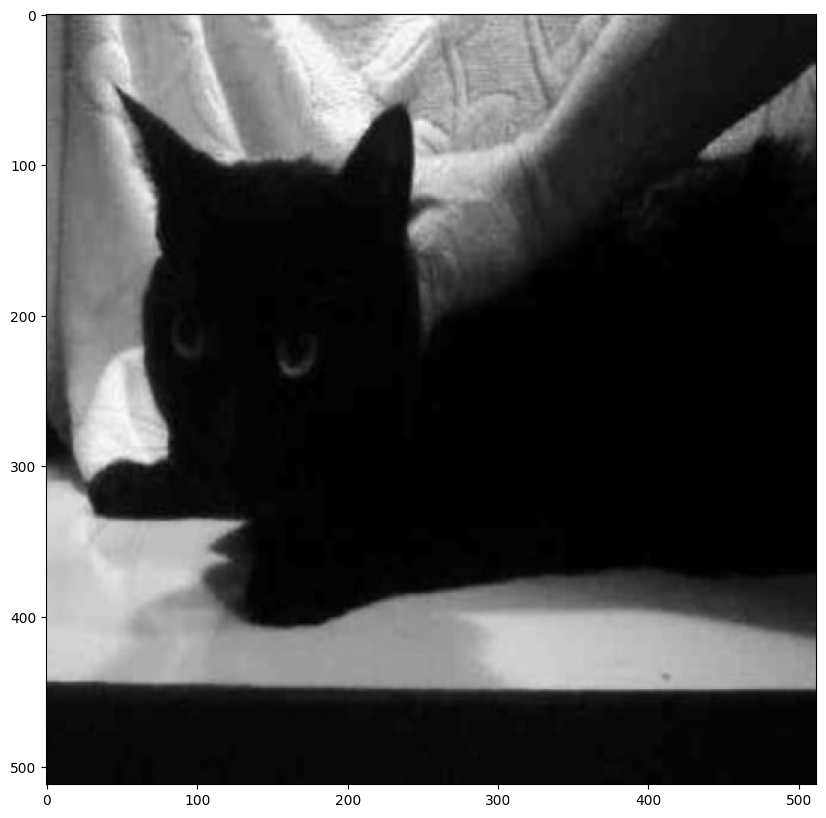

In [5]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform=transforms.Compose([
    transforms.Resize((512,512)),
    transforms.Grayscale(),
    transforms.ToTensor()
])


data=datasets.ImageFolder(root='/Users/pragunkathuria/.cache/kagglehub/datasets/bhavikjikadara/dog-and-cat-classification-dataset/versions/1',transform=transform)
loader=DataLoader(dataset=data,batch_size=10,shuffle=True)

for images,labels in loader:

  for i,j in zip(images,labels):
    plt.figure(figsize=(10,10))
    plt.imshow(i.squeeze(0),cmap='gray')
    plt.show()
    break

  break



In [9]:
import torch
import torch.nn as nn


class Distinguisher(nn.Module):

      def __init__(self):

        super().__init__()

        self.conv_layers=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=4,kernel_size=3,stride=2),
            nn.Conv2d(in_channels=4,out_channels=8,kernel_size=3,stride=1),
            nn.MaxPool2d(kernel_size=3,stride=2),

            nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,stride=2),
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1),
            nn.MaxPool2d(kernel_size=3,stride=2),

            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1),
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2),
            nn.MaxPool2d(kernel_size=3,stride=2)
        )


        self.net=nn.Sequential(
            nn.Linear(4608,5000),
            nn.ReLU(),
            nn.Linear(5000,2400),
            nn.ReLU(),

            nn.Linear(2400,1200),
            nn.ReLU(),
            nn.Linear(1200,900),
            nn.ReLU(),

            nn.Linear(900,600),
            nn.ReLU(),
            nn.Linear(600,300),
            nn.ReLU(),

            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,1),
            nn.Sigmoid()
        )

      def forward(self,img):
        features=self.conv_layers(img)
        print(features.shape)

        flattened_features=torch.flatten(features,start_dim=1)
        out=self.net(flattened_features)

        return out

In [10]:
model=Distinguisher()
epochs=10

criterion=nn.BCELoss()
optim_c=torch.optim.SGD(model.parameters(),lr=0.001)
for i in range(epochs):
  for images,labels in loader:
    classification=model(images)
    print(classification)

    loss=criterion(torch.squeeze(classification),labels)
    print(f"Loss log: {loss}")


torch.Size([10, 128, 6, 6])
tensor([[0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837],
        [0.4837]], grad_fn=<SigmoidBackward0>)


RuntimeError: Found dtype Long but expected Float